# * Forecasting – Decision Tree And Random Forest  ✨🎄

# ---------------------------------------------------------------------------

## Problem Statement:

## A cloth manufacturing company is interested to know about the segment or attributes contributing to high sale. Approach - A decision tree & random forest model can be built with target variable 'Sales' (we will first convert it into categorical variable) & all other variables will be independent in the analysis.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a  model  - To know about the segment or attributes contributing to high sale. Approach - A decision tree & random forest model can be built with target variable 'Sales'  & all other variables will be independent in the analysis.

## -------------------------------------------------------------------------------------------

## import libraries:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg

## import dataset:

In [2]:
sales = pd.read_csv(r"G:\360digit\assignments meterial\Decision tree\Company_Data.csv")
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
sales.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
sales.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### converting into binary:

In [6]:
lb = LabelEncoder()

In [7]:
sales["ShelveLoc"] = lb.fit_transform(sales["ShelveLoc"])

In [8]:
sales["Urban"] = lb.fit_transform(sales["Urban"])

In [9]:
sales["US"] = lb.fit_transform(sales["US"])

In [10]:
sales["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [11]:
sales["Sales"].median()

7.49

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

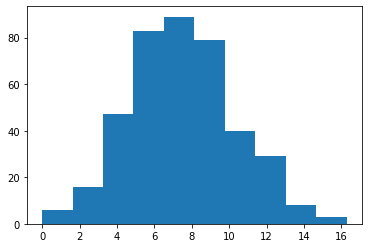

In [12]:
plt.hist(sales["Sales"])

In [13]:
sales['Sales'] = np.where( sales.Sales > 7.49, 1, 0) # Classify sales above 7.49 or less

In [14]:
colnames = list(sales.columns)

In [15]:
predictors = colnames[1:11]
predictors

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [16]:
target = colnames[0]
target

'Sales'

## Splitting data into training and testing data set:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(sales, test_size = 0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier as DT

In [20]:
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy')

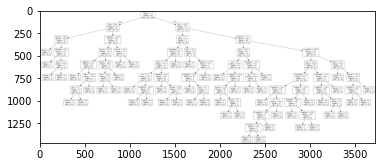

In [21]:
data = tree.export_graphviz(model, out_file=None, feature_names=predictors)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('companydecisiontree.png')

img=pltimg.imread('companydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

### Prediction on Test Data:

In [22]:
preds = model.predict(test[predictors])

In [23]:
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,45,16
1,20,39


In [24]:
np.mean(preds == test[target]) # Test Data Accuracy 

0.7

### Prediction on Train Data:

In [25]:
preds = model.predict(train[predictors])

In [26]:
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1
Actual,,
0,140,0
1,0,140


In [28]:
np.mean(preds== train[target]) # Train Data AccuracyTrain Test partition of the data

1.0

# Random forest:

In [29]:
df = pd.read_csv(r"G:\360digit\assignments meterial\Decision tree\Company_Data.csv")

In [30]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [32]:
df = pd.get_dummies(df, columns = ["ShelveLoc","Urban", "US" ], drop_first = True)

In [33]:
df['Sales'] = np.where( df.Sales > 7.49, 1, 0) # Classify sales above 7.49 or less

In [34]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,138,73,11,276,120,42,17,0,0,1,1
1,1,111,48,16,260,83,65,10,1,0,1,1
2,1,113,35,10,269,80,59,12,0,1,1,1
3,0,117,100,4,466,97,55,14,0,1,1,1
4,0,141,64,3,340,128,38,13,0,0,1,0


### Input and Output Split:

In [35]:
predictors = df.loc[:, df.columns!="Sales"]
type(predictors)

pandas.core.frame.DataFrame

In [36]:
target = df["Sales"]
type(target)

pandas.core.series.Series

### Train Test partition of the data:

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [40]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=1, random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[31,  4],
       [ 8, 37]], dtype=int64)

In [43]:
accuracy_score(y_test, rf_clf.predict(x_test))

0.85